In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [16]:
df = pd.read_csv(os.path.join("Q1_maternal_char_v7.csv"))
df.head()

,Mother_Education_Code,Mother_Weight_Gain_Code,Pre-pregnancy_Diabetes_Code,Pre-pregnancy_Hypertension_Code,Five_min_APGAR_score_code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI,Births
0,1.0,0.0,1.0,1.0,3.0,36.0,830.0,3.0,24.0,45.2,1.0
1,1.0,0.0,1.0,1.0,6.0,39.0,791.0,0.0,23.0,32.4,1.0
2,1.0,0.0,1.0,1.0,7.0,36.0,3560.0,20.0,37.0,38.6,1.0
3,1.0,0.0,1.0,1.0,8.0,35.2,2890.8,9.3,36.7,38.0,6.0
4,1.0,0.0,1.0,1.0,9.0,36.0,3041.7,15.6,38.1,39.8,26.0


In [31]:
df1 = df[['Five_min_APGAR_score_code', 'Mother_Education_Code', 'Mother_Weight_Gain_Code','Pre-pregnancy_Diabetes_Code', 'Pre-pregnancy_Hypertension_Code','Average_Age_Mother_years',
         'Average_Birth_Weight_grams','Average_Prenatal_Visits', 'Average_OE_Gestational_Age_weeks',
         'Average_Pre-pregnancy_BMI']]
df1.head()

,Five_min_APGAR_score_code,Mother_Education_Code,Mother_Weight_Gain_Code,Pre-pregnancy_Diabetes_Code,Pre-pregnancy_Hypertension_Code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI
0,3.0,1.0,0.0,1.0,1.0,36.0,830.0,3.0,24.0,45.2
1,6.0,1.0,0.0,1.0,1.0,39.0,791.0,0.0,23.0,32.4
2,7.0,1.0,0.0,1.0,1.0,36.0,3560.0,20.0,37.0,38.6
3,8.0,1.0,0.0,1.0,1.0,35.2,2890.8,9.3,36.7,38.0
4,9.0,1.0,0.0,1.0,1.0,36.0,3041.7,15.6,38.1,39.8


In [32]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [33]:
X = df1.iloc[:, 1:9].values
y = df1.iloc[:, 0].values

In [34]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 7 (0.213690)
2. feature 5 (0.197471)
3. feature 6 (0.164841)
4. feature 4 (0.157490)
5. feature 1 (0.154252)
6. feature 0 (0.079404)
7. feature 3 (0.017000)
8. feature 2 (0.015851)


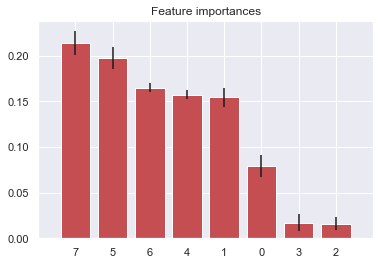

In [35]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [46]:
X1 = df1.iloc[:, 5:9].values
y1 = df1.iloc[:, 0].values

In [47]:
forest.fit(X1, y1)
importances1 = forest.feature_importances_
std1 = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices1 = np.argsort(importances1)[::-1]

In [50]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices1[f], importances1[indices1[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances1[indices1],
       color="r", yerr=std1[indices1], align="center")
plt.xticks(range(X.shape[1]), indices1)
plt.xlim([-1, X.shape[1]])
plt.show()

Feature ranking:
1. feature 1 (0.309251)
2. feature 0 (0.246297)
3. feature 2 (0.241324)
4. feature 3 (0.203129)


IndexError: index 4 is out of bounds for axis 0 with size 4

In [36]:
#select only continuous variables
df2 = df[['Five_min_APGAR_score_code','Average_Age_Mother_years',
         'Average_Birth_Weight_grams','Average_Prenatal_Visits','Average_OE_Gestational_Age_weeks',
         'Average_Pre-pregnancy_BMI']]
df2.head()

,Five_min_APGAR_score_code,Average_Age_Mother_years,Average_Birth_Weight_grams,Average_Prenatal_Visits,Average_OE_Gestational_Age_weeks,Average_Pre-pregnancy_BMI
0,3.0,36.0,830.0,3.0,24.0,45.2
1,6.0,39.0,791.0,0.0,23.0,32.4
2,7.0,36.0,3560.0,20.0,37.0,38.6
3,8.0,35.2,2890.8,9.3,36.7,38.0
4,9.0,36.0,3041.7,15.6,38.1,39.8


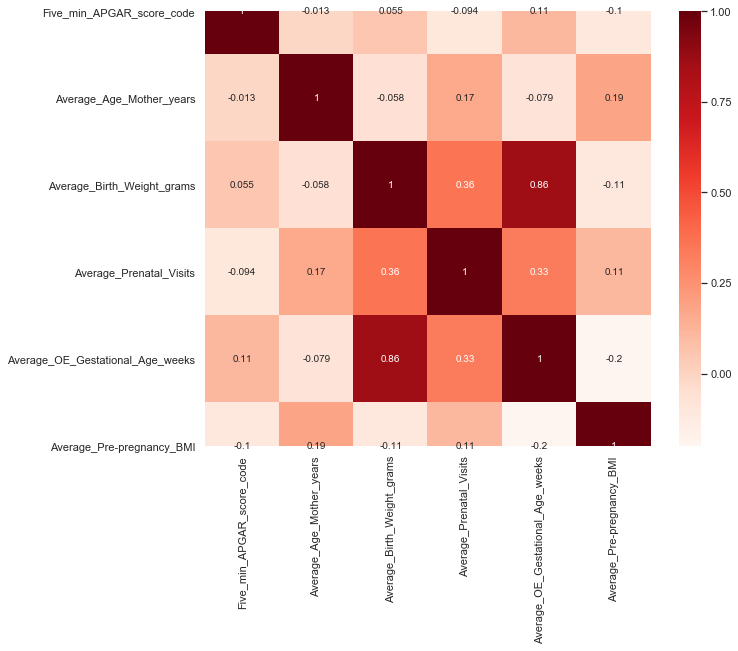

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [38]:
#Correlation with output variable
cor_target = abs(cor["Five_min_APGAR_score_code"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Five_min_APGAR_score_code           1.000000
Average_Age_Mother_years            0.012609
Average_Birth_Weight_grams          0.054593
Average_Prenatal_Visits             0.094464
Average_OE_Gestational_Age_weeks    0.112824
Average_Pre-pregnancy_BMI           0.103135
Name: Five_min_APGAR_score_code, dtype: float64

In [5]:
from sklearn.feature_selection import SelectKBest, chi2


In [9]:
X.shape

(21423, 9)

In [12]:
X_new = SelectKBest(score_func=chi2, k=4).fit_transform(X, y)

In [13]:
X_new.shape

(21423, 4)

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [15]:
print(model.feature_importances_)

NotFittedError: This ExtraTreesClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
print(model.feature_importances_)

NotFittedError: This ExtraTreesClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.